# Tidytuesday Cocktails R -> Julia
https://www.youtube.com/watch?v=kHFmtKCI_F4

In [411]:
using DataMunging
using Gadfly
using Queryverse
using RCall

In [3]:
R"library(tidyverse)"

┌ Warning: RCall.jl: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
│ ✔ ggplot2 3.3.2     ✔ purrr   0.3.4
│ ✔ tibble  3.0.3     ✔ dplyr   1.0.0
│ ✔ tidyr   1.1.0     ✔ stringr 1.4.0
│ ✔ readr   1.3.1     ✔ forcats 0.5.0
│ ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
│ ✖ dplyr::filter() masks stats::filter()
│ ✖ dplyr::lag()    masks stats::lag()
└ @ RCall /Users/brunods/.julia/packages/RCall/Qzssx/src/io.jl:160


RObject{StrSxp}
 [1] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
 [7] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     


In [19]:
R"
tuesdata <- tidytuesdayR::tt_load(2020, week = 22)
cocktails <- tuesdata$boston_cocktails
cocktails
"

┌ Warning: RCall.jl: --- Compiling #TidyTuesday Information for 2020-05-26 ----
│ --- There are 2 files available ---
│ --- Starting Download ---
│ --- Download complete ---
└ @ RCall /Users/brunods/.julia/packages/RCall/Qzssx/src/io.jl:160


RObject{VecSxp}
# A tibble: 3,643 x 6
   name        category         row_id ingredient_number ingredient      measure
   <chr>       <chr>             <dbl>             <dbl> <chr>           <chr>  
 1 Gauguin     Cocktail Classi…      1                 1 Light Rum       2 oz   
 2 Gauguin     Cocktail Classi…      1                 2 Passion Fruit … 1 oz   
 3 Gauguin     Cocktail Classi…      1                 3 Lemon Juice     1 oz   
 4 Gauguin     Cocktail Classi…      1                 4 Lime Juice      1 oz   
 5 Fort Laude… Cocktail Classi…      2                 1 Light Rum       1 1/2 …
 6 Fort Laude… Cocktail Classi…      2                 2 Sweet Vermouth  1/2 oz 
 7 Fort Laude… Cocktail Classi…      2                 3 Juice of Orange 1/4 oz 
 8 Fort Laude… Cocktail Classi…      2                 4 Juice of a Lime 1/4 oz 
 9 Apple Pie   Cordials and Li…      3                 1 Apple schnapps  3 oz   
10 Apple Pie   Cordials and Li…      3                 2 Cinnamon schna

In [20]:
@rget cocktails;
first(cocktails, 3)

,name,category,row_id,ingredient_number,ingredient,measure
,String,String,Float64,Float64,String,String
1,Gauguin,Cocktail Classics,1.0,1.0,Light Rum,2 oz
2,Gauguin,Cocktail Classics,1.0,2.0,Passion Fruit Syrup,1 oz
3,Gauguin,Cocktail Classics,1.0,3.0,Lemon Juice,1 oz


In [21]:
R"
glimpse(cocktails)
";

Rows: 3,643
Columns: 6
$ name              <chr> "Gauguin", "Gauguin", "Gauguin", "Gauguin", "Fort L…
$ category          <chr> "Cocktail Classics", "Cocktail Classics", "Cocktail…
$ row_id            <dbl> 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, …
$ ingredient_number <dbl> 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 2, 3, 1, 2, 3, 4, …
$ ingredient        <chr> "Light Rum", "Passion Fruit Syrup", "Lemon Juice", …
$ measure           <chr> "2 oz", "1 oz", "1 oz", "1 oz", "1 1/2 oz", "1/2 oz…


In [23]:
glimpse(cocktails, 5, 50)

name              <String>: Gauguin, Gauguin, Gauguin, Gauguin, Fort Lauderdal...
category          <String>: Cocktail Classics, Cocktail Classics, Cocktail Cla...
row_id            <Float64>: 1.0, 1.0, 1.0, 1.0, 2.0...
ingredient_number <Float64>: 1.0, 2.0, 3.0, 4.0, 1.0...
ingredient        <String>: Light Rum, Passion Fruit Syrup, Lemon Juice, Lime ...
measure           <String>: 2 oz, 1 oz, 1 oz, 1 oz, 1 1/2 oz...


# Counting
R uses `count`. Julia can use `by` from DataFrames or `groupby` + `map` from Queryverse

1. by.
2. groupby + map

In [27]:
R"
cocktails %>% count(name)
"

RObject{VecSxp}
# A tibble: 989 x 3
   name                      row_id     n
   <chr>                      <dbl> <int>
 1 1626                         433     5
 2 19th Century                 431     4
 3 A. J.                        657     2
 4 Absinthe Cocktail            436     4
 5 Absinthe Drip Cocktail       661     2
 6 Absinthe Special Cocktail     48     3
 7 Academic Review              426     6
 8 Acapulco                     660     5
 9 Adam and Eve                 121     4
10 Adderly Cocktail             417     4
# … with 979 more rows


In [89]:
first(
    sort(
        by(
            cocktails, 
            "name", 
            count = "name" => length), 
        "name"
        ), 
    5
)

,name,count
,String,Int64
1,1626,5
2,19th Century,4
3,A. J.,2
4,Absinthe Cocktail,4
5,Absinthe Drip Cocktail,2


In [88]:
cocktails |>
@groupby(_.name) |>
@map({name = key(_), count =  length(_.name)}) |>
@orderby(_.name) |>
@take(5) |>
DataFrame

,name,count
,String,Int64
1,1626,5
2,19th Century,4
3,A. J.,2
4,Absinthe Cocktail,4
5,Absinthe Drip Cocktail,2


In [33]:
R"
cocktails %>% count(name, row_id)
"

RObject{VecSxp}
# A tibble: 989 x 3
   name                      row_id     n
   <chr>                      <dbl> <int>
 1 1626                         433     5
 2 19th Century                 431     4
 3 A. J.                        657     2
 4 Absinthe Cocktail            436     4
 5 Absinthe Drip Cocktail       661     2
 6 Absinthe Special Cocktail     48     3
 7 Academic Review              426     6
 8 Acapulco                     660     5
 9 Adam and Eve                 121     4
10 Adderly Cocktail             417     4
# … with 979 more rows


In [123]:
first(
    sort(
        by(
            cocktails,
            ["name", "row_id"],
            count = "name" => length
        ),
        1
    ),
    5
)

,name,row_id,count
,String,Float64,Int64
1,1626,433.0,5
2,19th Century,431.0,4
3,A. J.,657.0,2
4,Absinthe Cocktail,436.0,4
5,Absinthe Drip Cocktail,661.0,2


In [122]:
cocktails |>
@groupby({_.name, _.row_id}) |>
@map({name = key(_)[1], row_id = key(_)[2], count = length(_)}) |>
@orderby(_.name) |>
@take(5) |>
DataFrame

,name,row_id,count
,String,Float64,Int64
1,1626,433.0,5
2,19th Century,431.0,4
3,A. J.,657.0,2
4,Absinthe Cocktail,436.0,4
5,Absinthe Drip Cocktail,661.0,2


name,count
"""Gauguin""",4
"""Fort Lauderdale""",4
"""Apple Pie""",2
"""Cuban Cocktail No. 1""",3
"""Cool Carlos""",5
"""John Collins""",5
"""Cherry Rum""",3
"""Casa Blanca""",4
"""Caribbean Champagne""",2
"""Amber Amour""",3


# Distinct
Confirm that row_id and name are the same.

In [138]:
R"
cocktails %>%
    group_by(name) %>%
    summarize(ids = n_distinct(row_id)) %>%
    filter(ids > 1)
"

┌ Warning: RCall.jl: `summarise()` ungrouping output (override with `.groups` argument)
└ @ RCall /Users/brunods/.julia/packages/RCall/Qzssx/src/io.jl:160


RObject{VecSxp}
# A tibble: 0 x 2
# … with 2 variables: name <chr>, ids <int>


`n_distinct` is equivalent to `length(unique(_.col))`

In [137]:
cocktails |>
@groupby(_.name) |>
@map({name = key(_), ids = length(unique(_.row_id))}) |>
@filter(_.ids > 1)

name,ids


This means we can ignore row_id

# How many ingredients?

In [139]:
R"
cocktails %>%
    count(name) %>%
    count(n)
"

┌ Warning: RCall.jl: Storing counts in `nn`, as `n` already present in input
│ ℹ Use `name = "new_name"` to pick a new name.
└ @ RCall /Users/brunods/.julia/packages/RCall/Qzssx/src/io.jl:160


RObject{VecSxp}
# A tibble: 6 x 2
      n    nn
  <int> <int>
1     1    31
2     2   118
3     3   292
4     4   297
5     5   194
6     6    57


In [171]:
sort(
    by(
        by(cocktails, 
           "name", n = "name" => length),
        "n", nn = "n" => length
    )
)

,n,nn
,Int64,Int64
1,1,31
2,2,118
3,3,292
4,4,297
5,5,194
6,6,57


In [160]:
cocktails |>
    @groupby(_.name) |>
    @map({n = length(_)}) |>
    @groupby(_.n) |>
    @map({n = key(_), nn = length(_)}) |>
    @orderby(_.n) |>
    DataFrame

,n,nn
,Int64,Int64
1,1,31
2,2,118
3,3,292
4,4,297
5,5,194
6,6,57


Find each cocktail that has only one ingredient

In [198]:
R"
cocktails %>%
    group_by(name) %>%
    filter(n() == 1)
"

RObject{VecSxp}
# A tibble: 31 x 6
# Groups:   name [31]
   name          category      row_id ingredient_numb… ingredient        measure
   <chr>         <chr>          <dbl>            <dbl> <chr>             <chr>  
 1 Brandy and S… Cocktail Cla…    149                1 Brandy            2 oz   
 2 Vodka and To… Vodka            156                1 Vodka             2 oz   
 3 Vodka and Ap… Vodka            162                1 Vodka             2 oz   
 4 Limestone     Cocktail Cla…    164                1 Bourbon           1 1/2 …
 5 Bourbon On T… Cocktail Cla…    170                1 Bourbon           2 oz   
 6 Saronno Mist  Cocktail Cla…    183                1 Amaretto di Saro… 1 1/2 …
 7 Mandarine Mi… Cocktail Cla…    195                1 Mandarine Napole… 1 1/2 …
 8 Hill Billy H… Cocktail Cla…    216                1 Georgia Moon Cor… 2 oz   
 9 Cafe di Saro… Cocktail Cla…    274                1 Amaretto di Saro… 1 oz   
10 Bourbon High… Whiskies         296               

In [267]:
df_count1 = cocktails |>
    @groupby(_.name) |>
    @map({name = key(_), n = length(_)}) |>
    @filter(_.n .== 1) |>
    DataFrame;

In [272]:
first(join(cocktails, df_count1, on = "name"), 5)

,name,category,row_id,ingredient_number,ingredient
,String,String,Float64,Float64,String
1,Brandy and Soda,Cocktail Classics,149.0,1.0,Brandy
2,Vodka and Tonic,Vodka,156.0,1.0,Vodka
3,Vodka and Apple Juice,Vodka,162.0,1.0,Vodka
4,Limestone,Cocktail Classics,164.0,1.0,Bourbon
5,Bourbon On The Rocks,Cocktail Classics,170.0,1.0,Bourbon


# Volume of each cocktail

In [283]:
R"""
cocktails %>%
    filter(str_detect(measure, "oz")) %>%
    mutate(oz = str_remove(measure, "oz")) %>%
    count(oz, sort = TRUE)
"""

RObject{VecSxp}
# A tibble: 19 x 2
   oz            n
   <chr>     <int>
 1 "1 "       1102
 2 "1/2 "      776
 3 "1 1/2 "    494
 4 "2 "        426
 5 "3/4 "      416
 6 "1/4 "      214
 7 "3 "         67
 8 "4 "         23
 9 "1 1/4 "     21
10 "5 "         15
11 "2 1/2 "     11
12 "1 3/4 "      8
13 "6 "          4
14 "1 2/3 "      3
15 "1/3 "        3
16 "24 "         3
17 "1  3/4 "     1
18 "16 "         1
19 "2 1/4 "      1


In [313]:
cocktails |>
    @filter(occursin.("oz", _.measure)) |>
    @mutate(oz = strip.(replace.(_.measure, "oz" => ""))) |>
    @groupby(_.oz) |>
    @map({oz = key(_), n = length(_)}) |>
    @orderby_descending(_.n) |>
    DataFrame

,oz,n
,SubStri…,Int64
1,1,1102
2,1/2,776
3,1 1/2,494
4,2,426
5,3/4,416
6,1/4,214
7,3,67
8,4,23
9,1 1/4,21


In [349]:
R"""
cocktails %>%
    filter(str_detect(measure, "oz")) %>%
    mutate(oz = str_remove(measure, "oz")) %>%
    mutate(oz = str_replace(oz, "1/2", ".5")) %>%
    mutate(oz = str_replace(oz, "1/4", ".25")) %>%
    mutate(oz = str_replace(oz, "3/4", ".75")) %>%
    mutate(oz = str_replace(oz, "2/3", ".667")) %>%
    mutate(oz = str_replace(oz, "1/3", ".333")) %>%
    mutate(oz = str_remove_all(oz, " ")) %>%
    mutate(oz = as.numeric(oz)) %>%
    count(oz, sort = TRUE)
"""

RObject{VecSxp}
# A tibble: 18 x 2
       oz     n
    <dbl> <int>
 1  1      1102
 2  0.5     776
 3  1.5     494
 4  2       426
 5  0.75    416
 6  0.25    214
 7  3        67
 8  4        23
 9  1.25     21
10  5        15
11  2.5      11
12  1.75      9
13  6         4
14  0.333     3
15  1.67      3
16 24         3
17  2.25      1
18 16         1


In [351]:
cocktails |>
    @filter(occursin.("oz", _.measure)) |>
    @mutate(oz = strip.(replace.(_.measure, "oz" => ""))) |>
    @mutate(oz = replace.(_.oz, "1/2" => ".5")) |>
    @mutate(oz = replace.(_.oz, "1/3" => ".333")) |>
    @mutate(oz = replace.(_.oz, "2/3" => ".667")) |>
    @mutate(oz = replace.(_.oz, "1/4" => ".25")) |>
    @mutate(oz = replace.(_.oz, "3/4" => ".75")) |>
    @mutate(oz = replace.(_.oz, " " => "")) |>
    @mutate(oz = tryparse.(Float64, _.oz)) |>
    @groupby(_.oz) |>
    @map({oz = key(_), n = length(_)}) |>
    @orderby_descending(_.n) |>
    DataFrame

,oz,n
,Any,Any
1,1.0,1102
2,0.5,776
3,1.5,494
4,2.0,426
5,0.75,416
6,0.25,214
7,3.0,67
8,4.0,23
9,1.25,21


In [350]:
R"""
sizes <- cocktails %>%
    filter(str_detect(measure, "oz")) %>%
    mutate(oz = str_remove(measure, "oz")) %>%
    mutate(oz = str_replace(oz, "1/2", ".5")) %>%
    mutate(oz = str_replace(oz, "1/4", ".25")) %>%
    mutate(oz = str_replace(oz, "3/4", ".75")) %>%
    mutate(oz = str_replace(oz, "2/3", ".667")) %>%
    mutate(oz = str_replace(oz, "1/3", ".333")) %>%
    mutate(oz = str_remove_all(oz, " ")) %>%
    mutate(oz = as.numeric(oz))

sizes %>% filter(oz > 3)
"""

RObject{VecSxp}
# A tibble: 46 x 7
   name         category     row_id ingredient_numb… ingredient    measure    oz
   <chr>        <chr>         <dbl>            <dbl> <chr>         <chr>   <dbl>
 1 Jocose Julep Whiskies         21                5 Fresh mint l… 5 oz        5
 2 Incider Coc… Whiskies         62                2 Apple cider   4 oz        4
 3 Greyhound    Cocktail Cl…     74                2 Grapefruit J… 5 oz        5
 4 Buddy's Fav… Cocktail Cl…    169                2 Cold Water    6 oz        6
 5 Bourbon and… Cocktail Cl…    172                2 Water         4 oz        4
 6 Fox River C… Whiskies        189                3 Angostura Bi… 4 oz        4
 7 Tea Saronno  Cocktail Cl…    229                1 Hot Tea       6 oz        6
 8 Sea Breeze   Vodka           253                2 Cranberry Ju… 4 oz        4
 9 Screwdriver  Vodka           254                2 Orange juice  5 oz        5
10 Salty Dog    Vodka           257                3 Grapefruit J… 5 oz   

In [354]:
sizes = cocktails |>
    @filter(occursin.("oz", _.measure)) |>
    @mutate(oz = strip.(replace.(_.measure, "oz" => ""))) |>
    @mutate(oz = replace.(_.oz, "1/2" => ".5")) |>
    @mutate(oz = replace.(_.oz, "1/3" => ".333")) |>
    @mutate(oz = replace.(_.oz, "2/3" => ".667")) |>
    @mutate(oz = replace.(_.oz, "1/4" => ".25")) |>
    @mutate(oz = replace.(_.oz, "3/4" => ".75")) |>
    @mutate(oz = replace.(_.oz, " " => "")) |>
    @mutate(oz = tryparse.(Float64, _.oz)) |>
    DataFrame

sizes |> @filter(_.oz > 3)

name,category,row_id,ingredient_number,ingredient,measure,oz
"""Jocose Julep""","""Whiskies""",21.0,5.0,"""Fresh mint leaves""","""5 oz""",5.0
"""Incider Cocktail""","""Whiskies""",62.0,2.0,"""Apple cider""","""4 oz""",4.0
"""Greyhound""","""Cocktail Classics""",74.0,2.0,"""Grapefruit Juice""","""5 oz""",5.0
"""Buddy's Favorite""","""Cocktail Classics""",169.0,2.0,"""Cold Water""","""6 oz""",6.0
"""Bourbon and Water""","""Cocktail Classics""",172.0,2.0,"""Water""","""4 oz""",4.0
"""Fox River Cocktail""","""Whiskies""",189.0,3.0,"""Angostura Bitters""","""4 oz""",4.0
"""Tea Saronno""","""Cocktail Classics""",229.0,1.0,"""Hot Tea""","""6 oz""",6.0
"""Sea Breeze""","""Vodka""",253.0,2.0,"""Cranberry Juice""","""4 oz""",4.0
"""Screwdriver""","""Vodka""",254.0,2.0,"""Orange juice""","""5 oz""",5.0
"""Salty Dog""","""Vodka""",257.0,3.0,"""Grapefruit Juice""","""5 oz""",5.0


In [356]:
sizes |> @filter(_.row_id == 304)

name,category,row_id,ingredient_number,ingredient,measure,oz
"""Bloody Scotsman""","""Whiskies""",304.0,1.0,"""Smoky Scotch whisky, such as Laphroaig""","""24 oz""",24.0
"""Bloody Scotsman""","""Whiskies""",304.0,2.0,"""Tomato Juice""","""24 oz""",24.0
"""Bloody Scotsman""","""Whiskies""",304.0,3.0,"""V8 cocktail juice""","""24 oz""",24.0
"""Bloody Scotsman""","""Whiskies""",304.0,5.0,"""Fresh Lime Juice""","""3 oz""",3.0
"""Bloody Scotsman""","""Whiskies""",304.0,6.0,"""Simple Syrup, 3/4 oz""","""3 oz""",3.0


In [364]:
R"
total_size <- sizes %>%
    group_by(name) %>%
    summarize(n = n(), oz = sum(oz))
total_size
"

┌ Warning: RCall.jl: `summarise()` ungrouping output (override with `.groups` argument)
└ @ RCall /Users/brunods/.julia/packages/RCall/Qzssx/src/io.jl:160


RObject{VecSxp}
# A tibble: 987 x 3
   name                          n    oz
   <chr>                     <int> <dbl>
 1 1626                          5  6.75
 2 19th Century                  4  3.75
 3 A. J.                         2  2.5 
 4 Absinthe Cocktail             4  6   
 5 Absinthe Drip Cocktail        2  2.5 
 6 Absinthe Special Cocktail     3  2.75
 7 Academic Review               6  5.25
 8 Acapulco                      4  5   
 9 Adam and Eve                  4  4   
10 Adderly Cocktail              4  5.5 
# … with 977 more rows


In [496]:
total_size = sizes |>
@groupby(_.name) |>
@map({name = key(_), n = length(_), oz = sum(_.oz)}) |>
@orderby(_) |>
DataFrame

first(total_size, 10)

,name,n,oz
,Any,Any,Any
1,1626,5,6.75
2,19th Century,4,3.75
3,A. J.,2,2.5
4,Absinthe Cocktail,4,6.0
5,Absinthe Drip Cocktail,2,2.5
6,Absinthe Special Cocktail,3,2.75
7,Academic Review,6,5.25
8,Acapulco,4,5.0
9,Adam and Eve,4,4.0


In [507]:
total_size["n"] = Int64.(total_size["n"])
total_size["oz"] = Float64.(total_size["oz"]);

## Are the total sizes the same?

In [460]:
R"
total_size_R <- total_size
"
@rget total_size_R;

In [517]:
all(total_size.name .== total_size_R.name)

false

In [518]:
total_sizes_join = join(total_size, total_size_R, on = "name", makeunique = true)
first(total_sizes_join, 4)

,name,n,oz,n_1,oz_1
,Any,Int64,Float64,Int64,Float64
1,1626,5,6.75,5,6.75
2,19th Century,4,3.75,4,3.75
3,A. J.,2,2.5,2,2.5
4,Absinthe Cocktail,4,6.0,4,6.0


In [519]:
all(total_sizes_join.oz == total_sizes_join.oz_1)

true

The two are the same

# Plot

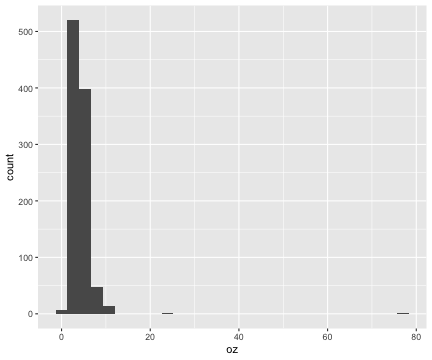

RObject{VecSxp}


┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall /Users/brunods/.julia/packages/RCall/Qzssx/src/io.jl:160


In [367]:
R"""
total_size %>%
    ggplot(aes(oz)) +
    geom_histogram()
"""

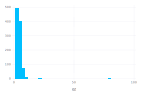

In [509]:
plot(total_size, x = "oz", Geom.histogram(bincount = 30))

In [432]:
R"""
total_size %>% filter(oz > 20)
"""

RObject{VecSxp}
# A tibble: 2 x 3
  name                n    oz
  <chr>           <int> <dbl>
1 Applejack Punch     4  22.8
2 Bloody Scotsman     5  78  


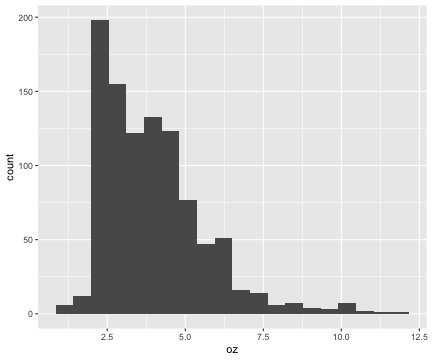

RObject{VecSxp}


In [510]:
R"""
total_size %>%
    filter(oz < 20) %>%
    ggplot(aes(oz)) +
    geom_histogram(bins = 20)
"""

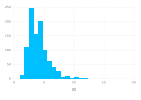

In [511]:
plot(total_size |> @filter(_.oz < 20) |> DataFrame, 
     x = "oz", Geom.histogram(bincount = 20))

In [539]:
total_size["name"] = string.(total_size["name"]);

In [598]:
cocktail_sizes = total_size |>
    @join(cocktails, _.name, _.name, {_.name, _.oz, __...}) |>
    DataFrame;
first(cocktail_sizes, 3)

,name,oz,category,row_id,ingredient_number,ingredient,measure
,String,Float64,String,Float64,Float64,String,String
1,1626,6.75,Whiskies,433.0,1.0,Bourbon whiskey,2 1/2 oz
2,1626,6.75,Whiskies,433.0,2.0,Gingerbread liqueur,3/4 oz
3,1626,6.75,Whiskies,433.0,3.0,cherry-flavored brandy,1/2 oz


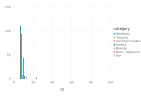

In [570]:
plot(cocktail_sizes, x = "oz", color = "category", 
     Geom.histogram(
        bincount = 20, 
        orientation = :vertical,
        position = :dodge))

In [597]:
cocktails |> @groupby(_.category) |> @map({category = key(_), count = length(_)})

category,count
"""Whiskies""",49
"""Tequila""",71
"""Cocktail Classics""",109
"""Vodka""",116
"""Brandy""",8
"""Rum - Daiquiris""",94
"""Gin""",6


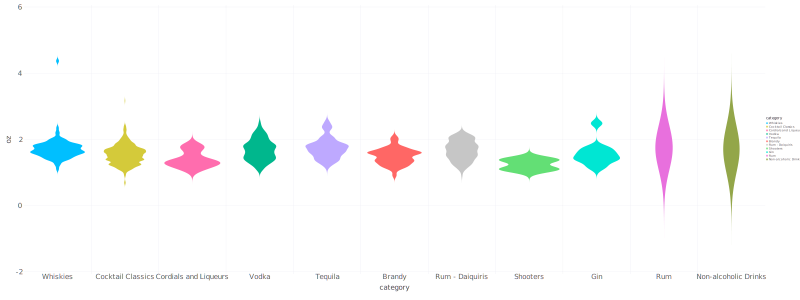

In [620]:
Gadfly.set_default_plot_size(80cm, 30cm)
Gadfly.plot(
    cocktail_sizes |> 
    @mutate(oz = log.(_.oz .+ 1)) |>
    DataFrame, x = "category", y = "oz", color = "category",      
    Geom.violin,
       style(major_label_font="CMU Serif",minor_label_font="CMU Serif",
             major_label_font_size = 20pt, minor_label_font_size = 20pt))

In [584]:
?Gadfly.plot

```
plot(data_source::Union{AbstractMatrix, AbstractDataFrame},
     elements::ElementOrFunctionOrLayers...; mapping...) -> Plot
```

Create a new plot by specifying a `data_source`, zero or more `elements` ([Scales](@ref lib_scale), [Statistics](@ref lib_stat), [Coordinates](@ref lib_coord), [Geometries](@ref lib_geom), [Guides](@ref lib_guide), [Themes](@ref), and/or [Layers](@ref)), and a `mapping` of aesthetics to columns or expressions of the data.

# Examples

```
my_frame = DataFrame(time=1917:2018, price=1.02.^(0:101))
plot(my_frame, x=:time, y=:price, Geom.line)

my_matrix = [1917:2018 1.02.^(0:101)]
plot(my_matrix, x=Col.value(1), y=Col.value(2), Geom.line,
     Guide.xlabel("time"), Guide.ylabel("price"))
```

---

```
plot(elements::ElementOrFunctionOrLayers...; aesthetics...) -> Plot
```

Create a new plot of the vectors in 'aesthetics'.  Optional `elements` ([Scales](@ref lib_scale), [Statistics](@ref lib_stat), [Coordinates](@ref lib_coord), [Geometries](@ref lib_geom), [Guides](@ref lib_guide), [Themes](@ref), and/or [Layers](@ref)) control the layout, labelling, and transformation of the data.

# Examples

```
plot(x=collect(1917:2018), y=1.02.^(0:101), Geom.line)
```

---

```
plot(data_source::Union{Void, AbstractMatrix, AbstractDataFrame},
     mapping::Dict, elements::ElementOrFunctionOrLayers...) -> Plot
```

The old fashioned (pre-named arguments) version of plot.  This version takes an explicit mapping dictionary, mapping aesthetics symbols to expressions or columns in the data frame.

---

```
plot(fs::Vector{T}, lower::Number, upper::Number, elements::ElementOrFunction...;
     mapping...) where T <: Base.Callable
```

---

```
plot(f::Function, lower::Number, upper::Number, elements::ElementOrFunction...;
     mapping...)
```

Plot the function or expression `f`, which takes a single argument or operates on a single variable, respectively, between the `lower` and `upper` bounds.  See [`Stat.func`](@ref) and [`Geom.line`](@ref).

---

```
plot(f::Function, xmin::Number, xmax::Number, ymin::Number, ymax::Number,
     elements::ElementOrFunction...; mapping...)
```

Plot the contours of the 2D function or expression in `f`. Uses [`Stat.contour`](@ref) for function calculation. See also [`Geom.contour`](@ref).

---

```
plot()
```

Blank plot.
